# Analysis of ACTIV trace data for checking concordance between illumina and ONT

In [424]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from IPython.display import display
rcParams.update({'figure.autolayout': True})
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
import sys
from matplotlib import pyplot as plt
plt.tight_layout()



<Figure size 576x576 with 0 Axes>

In [425]:


testset_activ = pd.read_csv("/Users/migunshakya/Projects/COVID19/ACTIV-TRACE-analysis/data/ONT_Illumina_TRACE_test_set.csv", sep=",")
testset_activ = testset_activ.applymap(lambda x: x.strip())
def primer_info(row):
    """Function to get primer information"""
    if "CoronaHiT" in row['attributes']:
        return "ARTIC-V3"
    elif "artic_primer_version_exp: 3" in row["attributes"]:
        return "ARTIC-V3"

    elif row["acc"] in ["SRR11397720", "SRR11397724", "SRR11397723", "SRR11397719", "SRR11397722", "SRR11397718", "SRR11410540", "SRR11410539", "SRR11410538", 
"SRR11410537", "SRR11547279",
"SRR11542244"]:
        return "ARTIC-V1"
    elif row["bioproject"] in ["PRJNA627229"]:
        return "ARTIC-V1"
    elif row["bioproject"] in ["PRJNA650037"]:
        return "ARTIC-V3"
    elif row["bioproject"] in ["PRJNA707211"]:
        if "RANDOM" in row["libraryselection"]:
            return "Tiled-ClickSeq"
        elif row["acc"] in ["SRR13870639", "SRR13870638", "SRR13870636", "SRR13870635", "SRR13870634", "SRR13870633", "SRR13870673", "SRR13870672", "SRR13870671"]:
            return "Tiled-ClickSeq"
        else:
            return "RNA-Seq"
    elif row["bioproject"] in ["PRJNA628662"]:
        return "ARTIC-V3"
    elif row["bioproject"] in ["PRJEB41737"]:
        return "ARTIC-V3"
    elif row["bioproject"] in ["PRJEB37886"]:
        return "ARTIC-V3"
    else:
        return "unknown"
testset_activ['primer_info'] = testset_activ.apply(primer_info, axis=1 )
testset_activ.head()

,acc,biosample,platform,bioproject,center_name,librarylayout,libraryselection,librarysource,attributes,primer_info
0,ERR5505783,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CENTRE,SINGLE,PCR,VIRAL RNA,bases: 15790321\nena_first_public_sam: 2020-07...,ARTIC-V3
1,ERR4364963,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CENTRE,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22\nsample_captur...,ARTIC-V3
2,ERR4365002,SAMEA7080096,OXFORD_NANOPORE,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CENTRE,SINGLE,PCR,VIRAL RNA,bases: 897417562\nbroker_name_sam: COVID-19 Ge...,ARTIC-V3
3,ERR5515580,SAMEA7080256,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CENTRE,SINGLE,PCR,VIRAL RNA,ena_first_public_sam: 2020-07-22\nhost_scienti...,ARTIC-V3
4,ERR4365241,SAMEA7080256,OXFORD_NANOPORE,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CENTRE,SINGLE,PCR,VIRAL RNA,assemblyname: assembly\nbytes: 1596883913\nhos...,ARTIC-V3


Number of SRRs = 412

Number of biosample = 154

Number of bioprojects = 9

Library selection methods = ["PCR", "Random", "RT-PCR"]

Number of sequencing centers = 12

ARTIC v3 protocols = 296

ARTIC v1 protocols = 22

RANDOM protocol = 76

Tiled-ClickSeq = 18

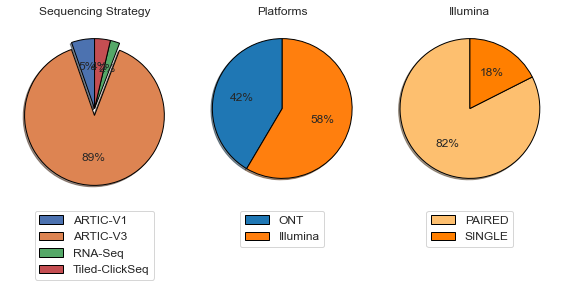

In [426]:

seq_app_count = testset_activ.groupby('primer_info').agg('count')['acc']
platform_count = testset_activ.groupby(['platform']).agg('count')['acc']
lib_lay_count = testset_activ[testset_activ['platform'] == "ILLUMINA"].groupby(['librarylayout']).agg('count')['acc']
#===============
label1 = 'ARTIC-V1', 'ARTIC-V3', 'RNA-Seq', 'Tiled-ClickSeq'
label2 = 'ONT', 'Illumina'
label3 = 'PAIRED', 'SINGLE'
explode = (0, 0.1, 0,0)
sns.set_style("white")
plt.subplot(1, 3, 1)
plt.title('Sequencing Strategy')
plt.pie(seq_app_count, startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
plt.legend(loc='upper center', labels=label1, fontsize='medium', bbox_to_anchor=(0.5, -0.05))
# ===================
plt.subplot(1, 3, 2)
plt.title('Platforms')
plt.pie(platform_count, startangle=90,colors=sns.color_palette("tab10"), wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
plt.legend(loc='upper center', labels=label2, fontsize='medium', bbox_to_anchor=(0.5, -0.05))
# ===================
plt.subplot(1, 3, 3)
plt.title('Illumina')
plt.pie(lib_lay_count, startangle=90, colors=sns.color_palette("Paired")[6:], wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
plt.legend(loc='upper center', labels=label3, fontsize='medium', bbox_to_anchor=(0.5, -0.05))
plt.tight_layout()
plt.show()

In [427]:

cov_df  = pd.read_csv("/Users/migunshakya/Projects/COVID19/ACTIV-TRACE-analysis/data/coverage.txt", sep="\t")
cov_df.columns = ["acc", "mapped_reads", "ref_recovery_perc", "avg_fold", "std_fold"]
cov_metadf = cov_df.merge(testset_activ, how="left", on="acc" )[['acc', 'mapped_reads', 'ref_recovery_perc', 'avg_fold', 'std_fold', 'biosample', 'platform', 'librarylayout', 'primer_info' ]]
cov_metadf


,acc,mapped_reads,ref_recovery_perc,avg_fold,std_fold,biosample,platform,librarylayout,primer_info
0,ERR4364963,1449899,99.7924,6731.29,8491.87,SAMEA7080096,ILLUMINA,PAIRED,ARTIC-V3
1,ERR4365125,1730349,92.6984,7975.84,14620.46,SAMEA7080256,ILLUMINA,PAIRED,ARTIC-V3
2,ERR4365209,3248384,99.8159,15139.40,15217.73,SAMEA7080342,ILLUMINA,PAIRED,ARTIC-V3
3,ERR4421397,628713,99.9431,2966.24,1732.06,SAMEA7080329,ILLUMINA,PAIRED,ARTIC-V3
4,ERR4421538,493422,99.9263,2297.76,1330.58,SAMEA7080380,ILLUMINA,PAIRED,ARTIC-V3
...,...,...,...,...,...,...,...,...,...
402,SRR13870634,184947,100.0000,4189.80,2088.22,SAMN18188239,OXFORD_NANOPORE,SINGLE,Tiled-ClickSeq
403,SRR13870635,224223,100.0000,4502.01,2545.61,SAMN18188238,OXFORD_NANOPORE,SINGLE,Tiled-ClickSeq
404,SRR13870636,217183,100.0000,4960.81,2519.76,SAMN18188237,OXFORD_NANOPORE,SINGLE,Tiled-ClickSeq
405,SRR13870638,277994,100.0000,6099.10,3349.11,SAMN18188234,OXFORD_NANOPORE,SINGLE,Tiled-ClickSeq


Text(0.5, 1.0, '% of genomes recovered (less than 95%)')

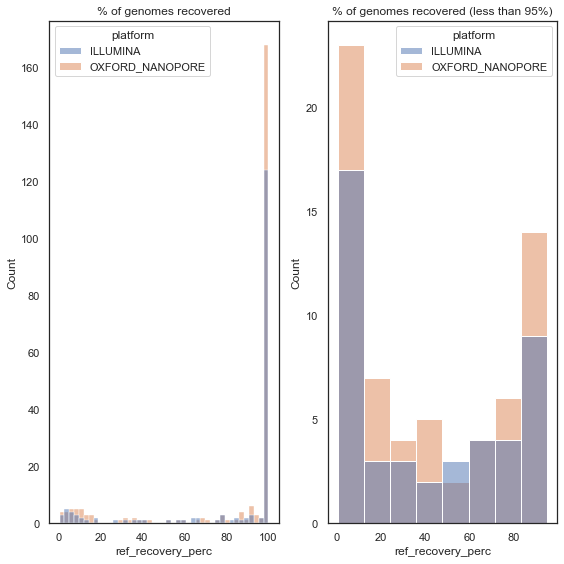

In [428]:
plt.subplot(1, 2, 1)
plt.title('% of genomes recovered')
sns.histplot(data=cov_metadf, x="ref_recovery_perc", hue="platform")
plt.subplot(1, 2, 2)
sns.histplot(data=cov_metadf[cov_metadf['ref_recovery_perc'] < 95 ], x="ref_recovery_perc", hue="platform")
plt.title('% of genomes recovered (less than 95%)')
# sns.histplot(data=cov_metadf, x="avg_fold")

Text(0.5, 1.0, 'Average Fold less than 50X')

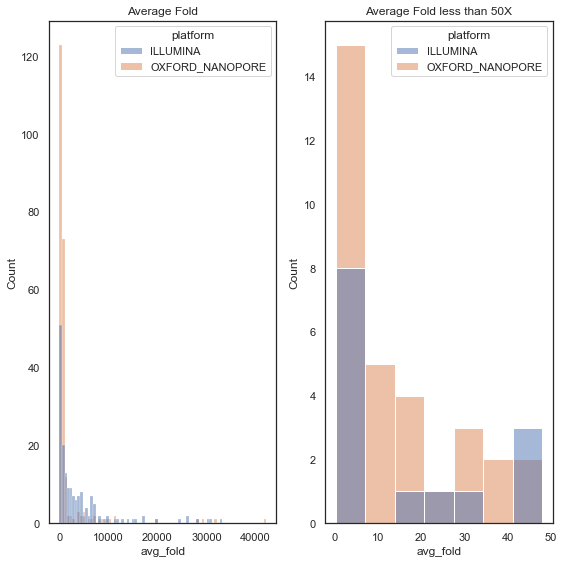

In [429]:
plt.subplot(1, 2, 1)
plt.title('Average Fold')
sns.histplot(data=cov_metadf, x="avg_fold", hue="platform")
plt.subplot(1, 2, 2)
sns.histplot(data=cov_metadf[cov_metadf['avg_fold'] < 50 ], x="avg_fold", hue="platform")
plt.title('Average Fold less than 50X')


In [430]:

dummy_avg_df = cov_metadf[cov_metadf['avg_fold'] > 50]
cov_filt_metadf = dummy_avg_df[dummy_avg_df['ref_recovery_perc'] > 80 ]
cov_filt_metadf = cov_filt_metadf.groupby('biosample').filter((lambda x: x['acc'].count() > 1))
cov_filt_metadf

,acc,mapped_reads,ref_recovery_perc,avg_fold,std_fold,biosample,platform,librarylayout,primer_info
0,ERR4364963,1449899,99.7924,6731.29,8491.87,SAMEA7080096,ILLUMINA,PAIRED,ARTIC-V3
1,ERR4365125,1730349,92.6984,7975.84,14620.46,SAMEA7080256,ILLUMINA,PAIRED,ARTIC-V3
2,ERR4365209,3248384,99.8159,15139.40,15217.73,SAMEA7080342,ILLUMINA,PAIRED,ARTIC-V3
3,ERR4421397,628713,99.9431,2966.24,1732.06,SAMEA7080329,ILLUMINA,PAIRED,ARTIC-V3
4,ERR4421538,493422,99.9263,2297.76,1330.58,SAMEA7080380,ILLUMINA,PAIRED,ARTIC-V3
...,...,...,...,...,...,...,...,...,...
402,SRR13870634,184947,100.0000,4189.80,2088.22,SAMN18188239,OXFORD_NANOPORE,SINGLE,Tiled-ClickSeq
403,SRR13870635,224223,100.0000,4502.01,2545.61,SAMN18188238,OXFORD_NANOPORE,SINGLE,Tiled-ClickSeq
404,SRR13870636,217183,100.0000,4960.81,2519.76,SAMN18188237,OXFORD_NANOPORE,SINGLE,Tiled-ClickSeq
405,SRR13870638,277994,100.0000,6099.10,3349.11,SAMN18188234,OXFORD_NANOPORE,SINGLE,Tiled-ClickSeq


In [431]:
ont_ill_activ = pd.read_csv("/Users/migunshakya/Projects/COVID19/ACTIV-TRACE-analysis/data/ONT_Illumina_TRACE_test_result_with_metadata.txt", sep="\t")
ont_ill_activ.head()

,Group_Name,Accession,Pos,Ref,Alt,DP,G_AD_2,Alt_Freq,biosample,platform,bioproject,center_name,librarylayout,libraryselection,librarysource,attributes,ec-19_run_with_primer_trim
0,LANL,ERR4364963,241,C,T,3510,3441,0.9806,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3
1,LANL,ERR4364963,3037,C,T,1752,1750,0.9994,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3
2,LANL,ERR4364963,4186,T,C,6464,6462,0.9998,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3
3,LANL,ERR4364963,11801,G,A,6513,6511,0.9997,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3
4,LANL,ERR4364963,14408,C,T,6418,6414,0.9995,SAMEA7080096,ILLUMINA,PRJEB37886,ORIGINATING LAB: WALES SPECIALIST VIROLOGY CEN...,PAIRED,PCR,VIRAL RNA,ena_last_update_sam: 2020-07-22;sample_capture...,artic_primer_v3


In [432]:
filt_df = ont_ill_activ[ont_ill_activ['Accession'].isin(cov_filt_metadf['acc'])][['Accession','Pos', 'Ref',	'Alt',	'DP',	'G_AD_2',	'Alt_Freq',	'biosample',	'platform',	'bioproject',	'librarylayout',	'libraryselection', 'librarysource', 'ec-19_run_with_primer_trim']]
filt_metadf = filt_df.merge(cov_filt_metadf[['acc', 'mapped_reads', 'avg_fold', 'std_fold', 'ref_recovery_perc']], left_on="Accession", right_on="acc", how="left")
filt_metadf=filt_metadf.merge(testset_activ[['acc', 'primer_info']], left_on="Accession", right_on="acc", how="left")
filt_metadf =filt_metadf.drop(['acc_x', 'acc_y'], axis=1)
filt_metadf = filt_metadf[filt_metadf['primer_info'] != "Tiled-ClickSeq"]
filt_metadf.head()

,Accession,Pos,Ref,Alt,DP,G_AD_2,Alt_Freq,biosample,platform,bioproject,librarylayout,libraryselection,librarysource,ec-19_run_with_primer_trim,mapped_reads,avg_fold,std_fold,ref_recovery_perc,primer_info
0,ERR4364963,241,C,T,3510,3441,0.9806,SAMEA7080096,ILLUMINA,PRJEB37886,PAIRED,PCR,VIRAL RNA,artic_primer_v3,1449899,6731.29,8491.87,99.7924,ARTIC-V3
1,ERR4364963,3037,C,T,1752,1750,0.9994,SAMEA7080096,ILLUMINA,PRJEB37886,PAIRED,PCR,VIRAL RNA,artic_primer_v3,1449899,6731.29,8491.87,99.7924,ARTIC-V3
2,ERR4364963,4186,T,C,6464,6462,0.9998,SAMEA7080096,ILLUMINA,PRJEB37886,PAIRED,PCR,VIRAL RNA,artic_primer_v3,1449899,6731.29,8491.87,99.7924,ARTIC-V3
3,ERR4364963,11801,G,A,6513,6511,0.9997,SAMEA7080096,ILLUMINA,PRJEB37886,PAIRED,PCR,VIRAL RNA,artic_primer_v3,1449899,6731.29,8491.87,99.7924,ARTIC-V3
4,ERR4364963,14408,C,T,6418,6414,0.9995,SAMEA7080096,ILLUMINA,PRJEB37886,PAIRED,PCR,VIRAL RNA,artic_primer_v3,1449899,6731.29,8491.87,99.7924,ARTIC-V3


In [433]:

filt_metadf.groupby(['ec-19_run_with_primer_trim']).count()
def assign_primer2(row):
    if row['ec-19_run_with_primer_trim'] == "artic_primer_v1":
        return "ARTIC-V1"
    elif row['ec-19_run_with_primer_trim'] == "artic_primer_v3":
        return "ARTIC-V3"
    else:
        return "no-primer"
filt_metadf['primer_info2'] = filt_metadf.apply(assign_primer2, axis=1)

filt_metadf = filt_metadf.loc[~((filt_metadf['primer_info'] == "ARTIC-V3") & (filt_metadf['primer_info2'] == "no-primer"))]
filt_metadf


,Accession,Pos,Ref,Alt,DP,G_AD_2,Alt_Freq,biosample,platform,bioproject,librarylayout,libraryselection,librarysource,ec-19_run_with_primer_trim,mapped_reads,avg_fold,std_fold,ref_recovery_perc,primer_info,primer_info2
0,ERR4364963,241,C,T,3510,3441,0.9806,SAMEA7080096,ILLUMINA,PRJEB37886,PAIRED,PCR,VIRAL RNA,artic_primer_v3,1449899,6731.29,8491.87,99.7924,ARTIC-V3,ARTIC-V3
1,ERR4364963,3037,C,T,1752,1750,0.9994,SAMEA7080096,ILLUMINA,PRJEB37886,PAIRED,PCR,VIRAL RNA,artic_primer_v3,1449899,6731.29,8491.87,99.7924,ARTIC-V3,ARTIC-V3
2,ERR4364963,4186,T,C,6464,6462,0.9998,SAMEA7080096,ILLUMINA,PRJEB37886,PAIRED,PCR,VIRAL RNA,artic_primer_v3,1449899,6731.29,8491.87,99.7924,ARTIC-V3,ARTIC-V3
3,ERR4364963,11801,G,A,6513,6511,0.9997,SAMEA7080096,ILLUMINA,PRJEB37886,PAIRED,PCR,VIRAL RNA,artic_primer_v3,1449899,6731.29,8491.87,99.7924,ARTIC-V3,ARTIC-V3
4,ERR4364963,14408,C,T,6418,6414,0.9995,SAMEA7080096,ILLUMINA,PRJEB37886,PAIRED,PCR,VIRAL RNA,artic_primer_v3,1449899,6731.29,8491.87,99.7924,ARTIC-V3,ARTIC-V3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,SRR13870670,11673,A,A(R),5821,2064,0.3546,SAMN18188238,ILLUMINA,PRJNA707211,PAIRED,RT-PCR,VIRAL RNA,NaN,6513244,30875.05,29860.30,99.9933,RNA-Seq,no-primer
7046,SRR13870670,14220,C,T(Y),7378,5034,0.6823,SAMN18188238,ILLUMINA,PRJNA707211,PAIRED,RT-PCR,VIRAL RNA,NaN,6513244,30875.05,29860.30,99.9933,RNA-Seq,no-primer
7047,SRR13870670,14408,C,T,7909,7871,0.9952,SAMN18188238,ILLUMINA,PRJNA707211,PAIRED,RT-PCR,VIRAL RNA,NaN,6513244,30875.05,29860.30,99.9933,RNA-Seq,no-primer
7048,SRR13870670,23403,A,G,7697,7593,0.9866,SAMN18188238,ILLUMINA,PRJNA707211,PAIRED,RT-PCR,VIRAL RNA,NaN,6513244,30875.05,29860.30,99.9933,RNA-Seq,no-primer


In [434]:

def check_diff(row):
    if len(set(row['Pos'].to_list())) == 1:
        return "no-difference"
    else:
        return "different"
diff_count = filt_metadf.groupby(['biosample', 'Accession']).agg('count')
diff_count = diff_count.reset_index()
diff_summary = diff_count.groupby(['biosample']).apply(check_diff)
diff_summary


biosample
SAMEA7080096        different
SAMEA7080256        different
SAMEA7080329        different
SAMEA7080342        different
SAMEA7080380        different
                    ...      
SAMN18188234    no-difference
SAMN18188237    no-difference
SAMN18188238        different
SAMN18188239        different
SAMN18188240        different
Length: 113, dtype: object

<BarContainer object of 2 artists>

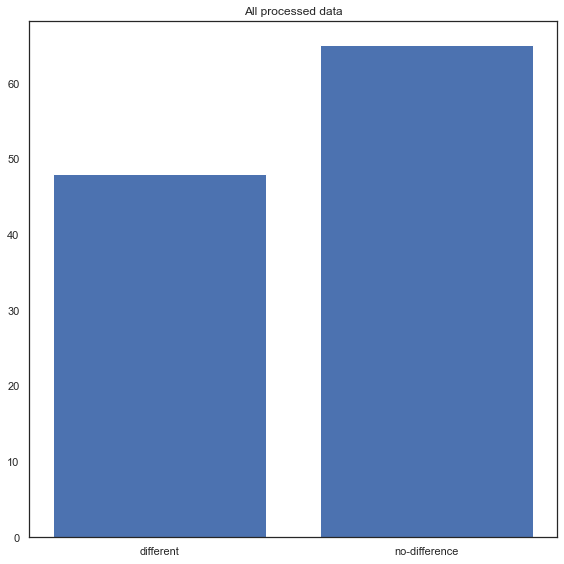

In [439]:

stat_df = pd.DataFrame(diff_summary)
stat_df.columns = ["status"]
stat_df = stat_df.reset_index()
all_diff = stat_df.groupby(['status']).agg('count')
all_diff
plt.title('All processed data')
plt.bar(x=all_diff.index, height=all_diff['biosample'])


In [448]:

stat_df[stat_df['status'] == "different"]['biosample']


0      SAMEA7080096
1      SAMEA7080256
2      SAMEA7080329
3      SAMEA7080342
4      SAMEA7080380
5      SAMEA7080463
6      SAMEA7174717
7      SAMEA7174808
8      SAMEA7175003
9      SAMEA7175086
10     SAMEA7504774
56     SAMEA8369092
57     SAMEA8369346
58     SAMEA8369643
59     SAMEA8371701
60     SAMEA8373217
61     SAMEA8376807
62     SAMEA8378398
63     SAMEA8378528
64     SAMEA8378575
65     SAMEA8379897
66     SAMEA8463723
67     SAMEA8464430
68     SAMEA8559278
69     SAMEA8559407
70     SAMEA9005639
71     SAMEA9005670
72     SAMEA9005938
73     SAMEA9006536
74     SAMEA9006717
75     SAMN14422705
76     SAMN14422706
77     SAMN14422707
78     SAMN14444189
79     SAMN14444190
80     SAMN14652906
81     SAMN14652907
82     SAMN14652908
83     SAMN14652909
84     SAMN14652910
85     SAMN15691563
86     SAMN15691564
91     SAMN15691624
94     SAMN15691627
104    SAMN15691639
110    SAMN18188238
111    SAMN18188239
112    SAMN18188240
Name: biosample, dtype: object

In [ ]:
stat_df[stat_df['status'] == "different"]['biosample']
